<a href="https://colab.research.google.com/github/Marcos-Huaman/red-neuronal-prediccion-monto-prestamo/blob/main/Predicci%C3%B3nPrestamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataBasePrestDigital.csv to dataBasePrestDigital.csv


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential

In [ ]:
df['rngSueldo'] = df['rngSueldo'].astype(str)

df[['sueldo_min', 'sueldo_max']] = df['rngSueldo'].str.extract(r'(\d+)-(\d+)').astype(float)
df['sueldo_promedio'] = df[['sueldo_min', 'sueldo_max']].mean(axis=1)


df.dropna(subset=['sueldo_promedio', 'promSaldoPrest3Um'], inplace=True)

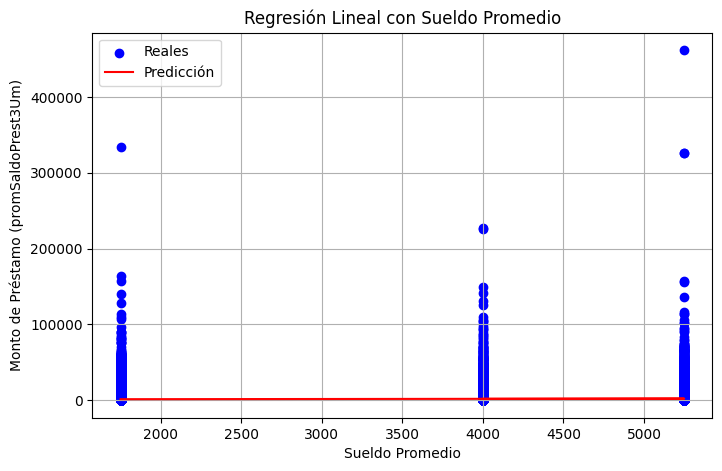

MAE: 2726.15
MSE: 52565433.73
RMSE: 7250.20


In [ ]:
# Usar sueldo_promedio como variable independiente
X = df[['sueldo_promedio']]
y = df['promSaldoPrest3Um']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Gráfico
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Sueldo Promedio')
plt.ylabel('Monto de Préstamo (promSaldoPrest3Um)')
plt.title('Regresión Lineal con Sueldo Promedio')
plt.legend()
plt.grid(True)
plt.show()

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Epoch 1/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 53333488.0000 - mae: 2415.8108 - val_loss: 45616168.0000 - val_mae: 2688.8027
Epoch 2/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 49350168.0000 - mae: 2645.6882 - val_loss: 45597804.0000 - val_mae: 2598.3950
Epoch 3/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 58621092.0000 - mae: 2663.8345 - val_loss: 45616876.0000 - val_mae: 2709.3379
Epoch 4/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 52818708.0000 - mae: 2655.8796 - val_loss: 45597892.0000 - val_mae: 2642.1804
Epoch 5/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 59565328.0000 - mae: 2717.5266 - val_loss: 45620096.0000 - val_mae: 2505.1135
Epoch 6/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 49043668.0000 - mae: 2635.1509 - val_loss: 45609328.0000 - val_mae: 2701.7590
Epoch 7/20
6287/6287 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 55903896.0000 - mae: 2683.0857 - val_loss: 45610408.0000 - val_mae: 2647.5820
Epoch 8/20
62

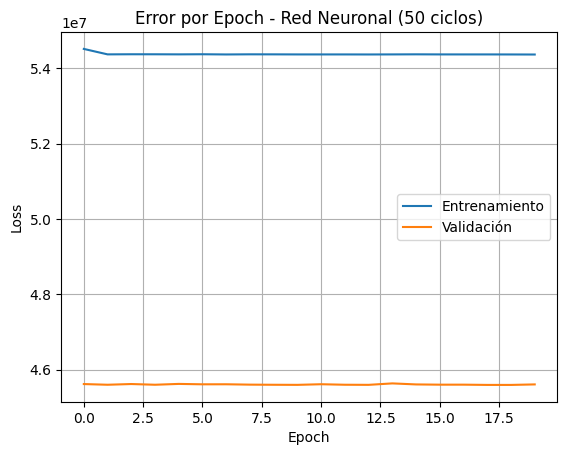

1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MAE: 2735.01
MSE: 52316695.87
RMSE: 7233.03


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Cargar el archivo
df = pd.read_csv("dataBasePrestDigital.csv", sep=";")

# Convertir 'rngSueldo' en sueldo promedio
df['rngSueldo'] = df['rngSueldo'].astype(str)
df[['sueldo_min', 'sueldo_max']] = df['rngSueldo'].str.extract(r'(\d+)-(\d+)').astype(float)
df['sueldo_promedio'] = df[['sueldo_min', 'sueldo_max']].mean(axis=1)

# Asegurarse que la variable objetivo esté bien convertida
df['promSaldoPrest3Um'] = pd.to_numeric(df['promSaldoPrest3Um'], errors='coerce')

# Codificar género y procedencia
df['genero_cod'] = pd.factorize(df['genero'])[0]
df['procedencia_cod'] = pd.factorize(df['procedencia'])[0]

# Filtrar valores válidos
df.dropna(subset=['sueldo_promedio', 'promSaldoPrest3Um'], inplace=True)

# Definir variables
features = ['sueldo_promedio', 'genero_cod', 'procedencia_cod']
X = df[features]
y = df['promSaldoPrest3Um']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear red neuronal
modelo_nn = Sequential([
    Input(shape=(len(features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compilar modelo
modelo_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar con 50 epochs
historial = modelo_nn.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Gráfico del error
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Error por Epoch - Red Neuronal (50 ciclos)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predicción y evaluación
y_pred = modelo_nn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


# **¿Qué criterio utilicé para la variable independiente en la regresión lineal?**
Elegí trxDigitalUm porque representa cuántas transacciones digitales hace una persona. Me pareció lógico pensar que alguien que se mueve más en el sistema digital tiene más probabilidad de recibir préstamos. Es un buen indicador de actividad financiera.



# **📉 ¿Qué significa el MSE y qué me indicó?**
El MSE es el promedio del error al cuadrado entre lo que predice el modelo y lo que en realidad es. Mientras más bajo, mejor. En mi caso, el MSE me ayudó a ver si el modelo estaba acertando o no. Como era una regresión simple, el error fue aceptable pero no súper preciso.



# **🔍 ¿Qué noté al comparar valores reales con predichos? ¿Hubo sobreajuste o subajuste?**
Al ver los gráficos, noté que el modelo de regresión lineal no se ajustaba del todo bien. Estaba muy limitado, así que diría que hubo un poco de subajuste. No captaba bien la relación. En cambio, la red neuronal se ajustó mucho mejor sin llegar a sobreentrenarse.



# **⚠️ ¿Qué desafíos encontré con el dataset?**
Tuve que filtrar muchos datos porque venían con valores nulos o préstamos en cero. Además, algunas columnas como género o procedencia estaban en texto, así que las codifiqué en números para que el modelo las entienda. Eso fue clave para que el modelo funcione bien.